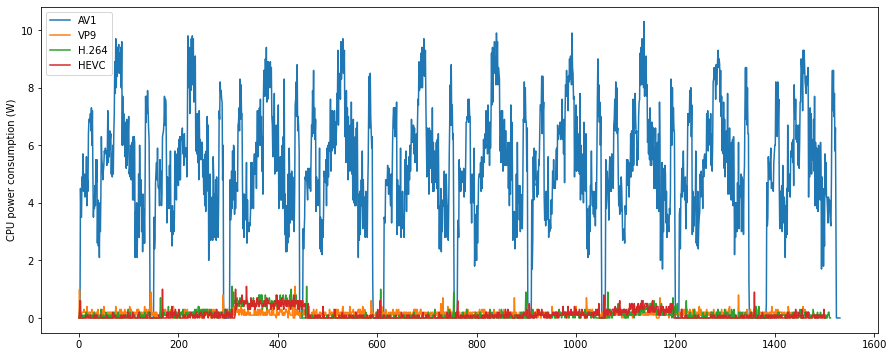

In [68]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

AV1 = pd.concat([pd.read_csv(f, sep=',', na_values=".") for f in glob.glob('AV1/*.csv')], ignore_index=True)
VP9 = pd.concat([pd.read_csv(f, sep=',', na_values=".") for f in glob.glob('VP9/*.csv')], ignore_index=True)
H264 = pd.concat([pd.read_csv(f, sep=',', na_values=".") for f in glob.glob('H264/*.csv')], ignore_index=True)
HEVC = pd.concat([pd.read_csv(f, sep=',', na_values=".") for f in glob.glob('HEVC/*.csv')], ignore_index=True)

AV1.set_axis(['Time', 'Total', 'CPU', 'Monitor', 'Disk', 'Base', 'App', 'Codec'], axis='columns', inplace=True)
VP9.set_axis(['Time', 'Total', 'CPU', 'Monitor', 'Disk', 'Base', 'App', 'Codec'], axis='columns', inplace=True)
H264.set_axis(['Time', 'Total', 'CPU', 'Monitor', 'Disk', 'Base', 'App', 'Codec'], axis='columns', inplace=True)
HEVC.set_axis(['Time', 'Total', 'CPU', 'Monitor', 'Disk', 'Base', 'App', 'Codec'], axis='columns', inplace=True)

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)


plt.plot(AV1.App, label='AV1')
plt.plot(VP9.App, label='VP9')
plt.plot(H264.App, label='H.264')
plt.plot(HEVC.App, label='HEVC')
plt.ylabel('CPU power consumption (W)')

plt.legend()

plt.show()

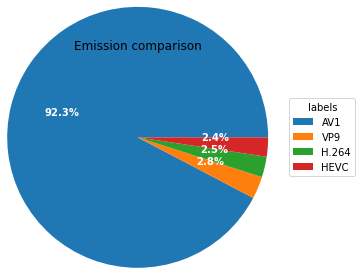

In [69]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))


sizes = [1.001837551, 0.0300144436, 0.0276434098, 0.025843569]
labels = 'AV1', 'VP9', 'H.264', 'HEVC'


def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n".format(pct, absolute)

wedges, texts, autotexts = ax.pie(sizes, autopct=lambda pct: func(pct, sizes), radius=2,
                                  textprops=dict(color="w"))

ax.legend(wedges, labels,
          title="labels",
          loc="center left",
          bbox_to_anchor=(1.4, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Emission comparison")

plt.show()

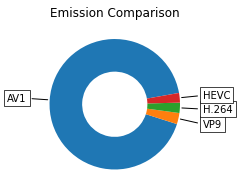

In [70]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

sizes = [1.001837551, 0.0300144436, 0.0276434098, 0.025843569]
label = 'AV1', 'VP9', 'H.264', 'HEVC'

wedges, texts = ax.pie(sizes, wedgeprops=dict(width=0.5), startangle=10)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")


for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(label[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Emission Comparison")

plt.show()